In [49]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
print(tf.__version__, keras.__version__)

2.2.0 2.3.0-tf


### utilities

In [39]:
def load_data(data_set: str) -> "keras lib dataset":
    """Return a demo data from tf keras datasets collection"""
    data_instance = eval(f"keras.datasets.{data_set}")
    (X, y), (X_test, y_test) = data_instance.load_data()
    return (X, y), (X_test, y_test)

In [40]:
def norm(data: "pandas.DataFrame", norm: float = 255.0) -> "pandas.DataFrame":
    """Return a normalized dataframe"""
    return (data / norm)

----------------------------------------------------------------------

In [41]:
(X, y), (X_test, y_test) = load_data("fashion_mnist")

In [42]:
X_train = norm(X[5000:])
X_valid = norm(X[:5000])
X_test = norm(X_test)

y_train = y[5000:]
y_valid = y[:5000]

In [18]:
model = \
keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28,28]),
    keras.layers.Dense(300, activation = "relu"),
    keras.layers.Dense(100, activation = "relu"),
    keras.layers.Dense(10, activation = "softmax")      
])

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = "sgd",
              metrics = ["accuracy"])

In [21]:
history = model.fit(X_train, y_train,
          epochs = 30,
          validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7054 - accuracy: 0.7693 - val_loss: 0.5249 - val_accuracy: 0.8166
Epoch 2/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4812 - accuracy: 0.8324 - val_loss: 0.4535 - val_accuracy: 0.8388
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4367 - accuracy: 0.8469 - val_loss: 0.4340 - val_accuracy: 0.8472
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4096 - accuracy: 0.8562 - val_loss: 0.3828 - val_accuracy: 0.8682
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3904 - accuracy: 0.8618 - val_loss: 0.3873 - val_accuracy: 0.8648
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3746 - accuracy: 0.8685 - val_loss: 0.3744 - val_accuracy: 0.8708
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3638 - accuracy: 0.8714 - val_loss: 0.3513 - val_accuracy:

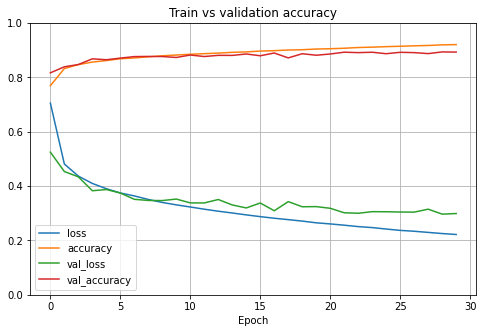

In [43]:
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.xlabel("Epoch"), plt.title("Train vs validation accuracy")
plt.show()

In [44]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3336 - accuracy: 0.8819


[0.3335707187652588, 0.8819000124931335]

In [132]:
X_new = X_test[0].reshape(1,28,28)
print(f"input dim: {X_new.shape}")
y_proba = model.predict(X_new)
y_proba.round(2)

input dim: (1, 28, 28)


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.04, 0.  , 0.95]],
      dtype=float32)

In [133]:
y_pred = model.predict_classes(X_new)

In [134]:
class_names = ["Top", "Pants", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Shoe", "Bag", "Ankle boot"]

In [135]:
np.array(class_names)[y_pred]

array(['Ankle boot'], dtype='<U10')